In [1]:

# import the libries
using Plots
using PlotThemes

theme(:orange)



In [36]:

# declare the variables
###variable declarations
nx = 101
ny = 101
nt = 90
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx

x = range(0, 2, length = nx)
y = range(0, 2, length = ny)

u =ones(ny, nx) ##create a 1xn vector of 1's
v =ones(ny, nx)
un = ones(ny, nx)

###Assign initial conditions
u[0.5 .<= y .<= 1, 0.5 .<= x .<= 1] .= 2;
v[0.5 .<= y .<= 1, 0.5 .<= x .<= 1] .= 2;


In [37]:


## create meshgrid function to create the grid
#function meshgrid(x, y)
#    X = repeat(x, 1, length(y))
#    Y = repeat(y', length(x), 1)
#    return X, Y
#end
#
## create grid from
#X, Y = meshgrid(x, y);
## plot the initial conditions using vector field quiver with color by length
#gr()
#quiver(X, Y, quiver2d = (u./30, v./15), aspect_ratio=:equal)




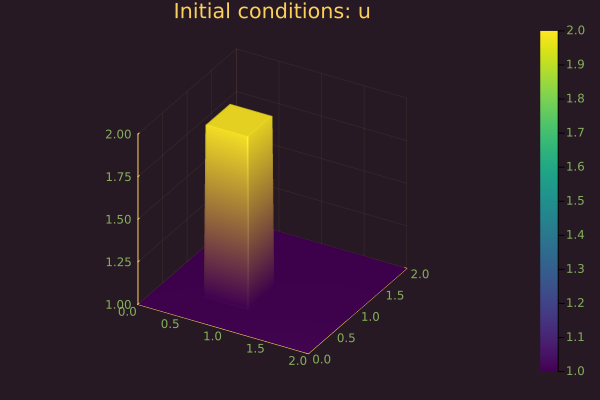

In [38]:
# plot u as a surface
surface(x, y, u, title = "Initial conditions: u")

In [39]:
# create an array to store the values of u and v at each time step
uvn = ones(ny, nx, nt, 2)

# assign the initial conditions to the first time step
uvn[:, :, 1, 1] = copy(u);
uvn[:, :, 1, 2] = copy(v);

In [40]:
# set boundary conditions
uvn[1, :, :, :] .= 1;
uvn[end, :, :, :] .= 1;
uvn[:, 1, :, :] .= 1;
uvn[:, end, :, :] .= 1;

In [41]:
# loop over the time steps
for n ∈ 1:nt-1, i ∈ 2:nx, j ∈ 2:ny
    uvn[i, j, n+1, 1] = uvn[i, j, n, 1] - 
        uvn[i, j, n, 1] * dt / dx * (uvn[i, j, n, 1] - uvn[i-1, j, n, 1]) - 
        uvn[i, j, n, 2] * dt / dy * (uvn[i, j, n, 1] - uvn[i, j-1, n, 1]);

    uvn[i, j, n+1, 2] = uvn[i, j, n, 2] -
        uvn[i, j, n, 1] * dt / dx * (uvn[i, j, n, 2] - uvn[i-1, j, n, 2]) -
        uvn[i, j, n, 2] * dt / dy * (uvn[i, j, n, 2] - uvn[i, j-1, n, 2]);
end

┌ Info: Saved animation to /home/fuad/MyCodes/Julia/CFDJulia/tmp.gif
└ @ Plots /home/fuad/.julia/packages/Plots/wutJB/src/animation.jl:149


Plots.AnimatedGif("/home/fuad/MyCodes/Julia/CFDJulia/tmp.gif")
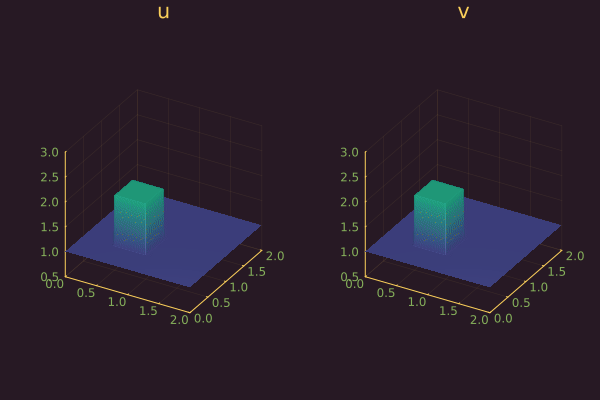

In [48]:
# with subplot plot the surfaces


@gif for n in 1:nt
    p1 = surface(x, y, uvn[:, :, n, 1], title = "u", zlim = (0.5, 3), legend=false)
    p2 = surface(x, y, uvn[:, :, n, 2], title = "v", zlim = (0.5, 3), legend=false)
    plot(p1, p2, layout=(1,2))
end